In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
all_evaluations = pd.read_csv("./evaluations/all_evaluations.csv")
all_evaluations

,target,browser,player,codec,platform,user,data_points,mean,stdev,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,codec,FIREFOX,MPLAYER,*,Windows-10-10.0.19044-SP0,*,400,36.000000,5.385165,40.000000,32.500000,41.250000,41.250000,36.250000,23.750000,40.000000,32.500000,32.500000,40.000000
1,codec,FIREFOX,MPV,*,Windows-10-10.0.19044-SP0,*,400,32.375000,4.125000,33.750000,35.000000,35.000000,36.250000,33.750000,37.500000,23.750000,32.500000,27.500000,28.750000
2,codec,FIREFOX,VLC,*,Windows-10-10.0.19044-SP0,*,400,50.375000,3.710206,50.000000,48.750000,43.750000,50.000000,51.250000,51.250000,56.250000,55.000000,52.500000,45.000000
3,codec,CHROME,MPLAYER,*,Windows-10-10.0.19044-SP0,*,400,59.750000,5.471517,58.750000,51.250000,55.000000,65.000000,57.500000,60.000000,63.750000,71.250000,60.000000,55.000000
4,codec,CHROME,MPV,*,Windows-10-10.0.19044-SP0,*,400,63.750000,3.535534,58.750000,61.250000,70.000000,63.750000,61.250000,67.500000,62.500000,61.250000,62.500000,68.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,player,SAFARI,*,sample.mkv,*,*,300,99.666667,0.666667,100.000000,100.000000,100.000000,100.000000,100.000000,98.333333,100.000000,100.000000,98.333333,100.000000
181,player,FIREFOX,*,sample.mp4,*,*,900,68.777778,3.010270,67.222222,65.555556,70.000000,68.333333,68.888889,62.777778,71.111111,71.666667,73.888889,68.333333
182,player,CHROME,*,sample.mp4,*,*,900,84.500000,1.833333,85.555556,81.111111,85.555556,84.444444,85.555556,83.888889,81.111111,85.555556,85.555556,86.666667
183,player,EDGE,*,sample.mp4,*,*,600,81.916667,1.493039,80.000000,80.833333,80.833333,82.500000,84.166667,81.666667,81.666667,84.166667,80.000000,83.333333


In [16]:
def filter_data(df, target, player, codec, browser, platform):
    if target is not None:
        df = df[all_evaluations["target"] == target]
    
    if codec is not None:
        df = df[df["codec"] == codec]
    
    if browser is not None:
        df = df[df["browser"] == browser]

    if platform is not None:
        df = df[df["platform"] == platform]

    return df

In [14]:
def transpose_data(df: pd.DataFrame):
    df_melted = df.melt(id_vars=["target", "browser", "player", "codec", "platform"], 
                   value_vars=["fold_1", "fold_2", "fold_3", "fold_4", "fold_5", "fold_6", "fold_7", "fold_8", "fold_9", "fold_10"], 
                   var_name="fold", value_name="value")
    return df_melted

# Plots

## Target = codec

### Each plot is separate browser

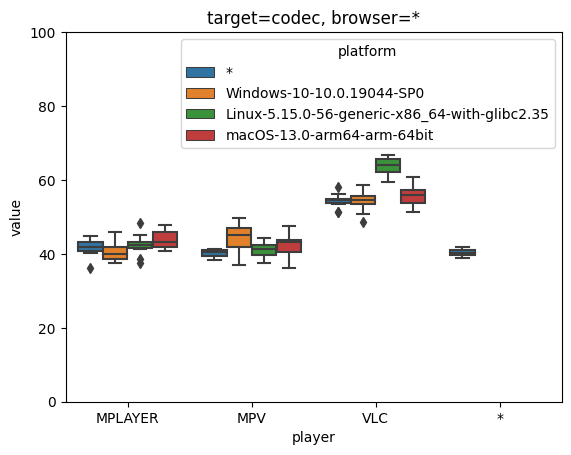

In [42]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=*")
plt.show()

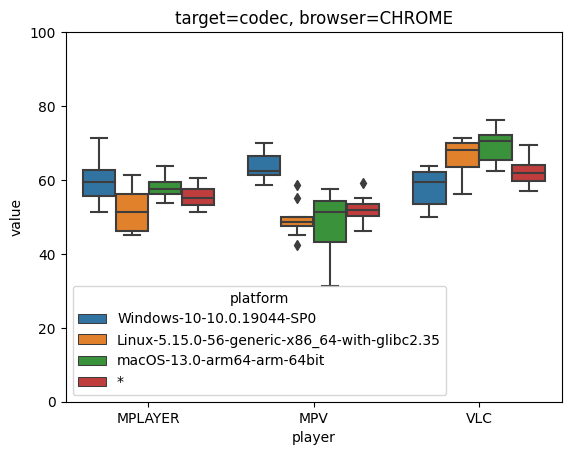

In [44]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=CHROME")
plt.show()

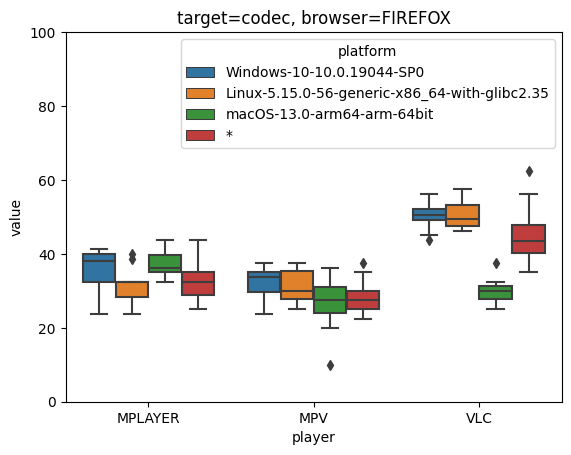

In [45]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=FIREFOX")
plt.show()

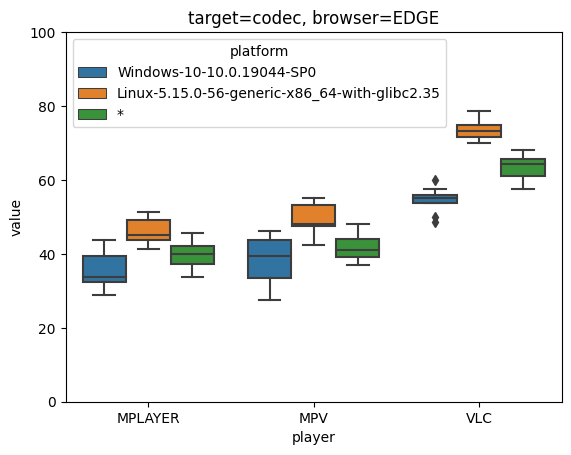

In [46]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=EDGE")
plt.show()

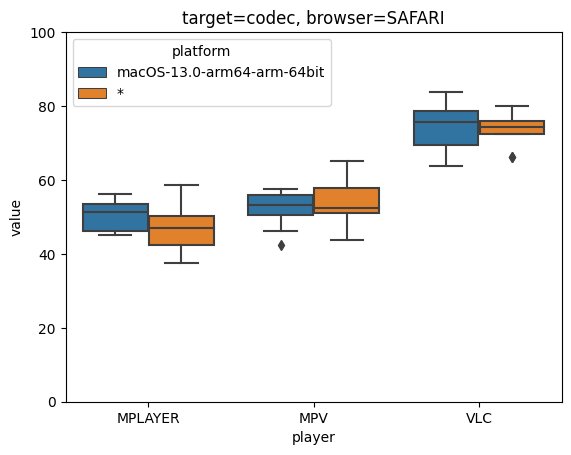

In [47]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=SAFARI")
plt.show()

In [ ]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

### Each plot is separate platform

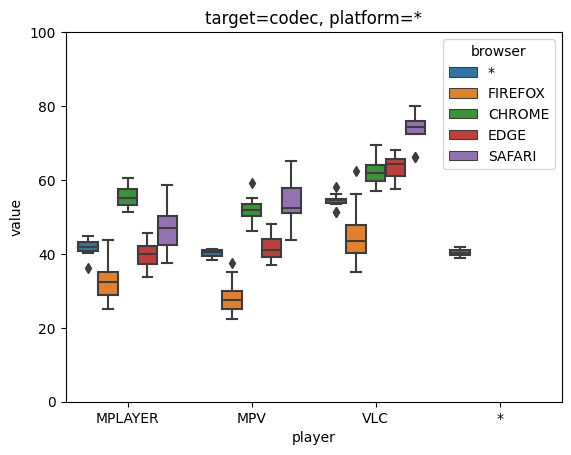

In [48]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=*")
plt.show()

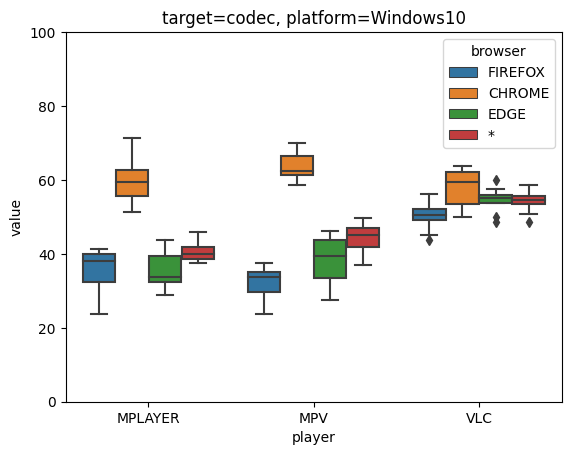

In [49]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Windows-10-10.0.19044-SP0"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Windows10")
plt.show()

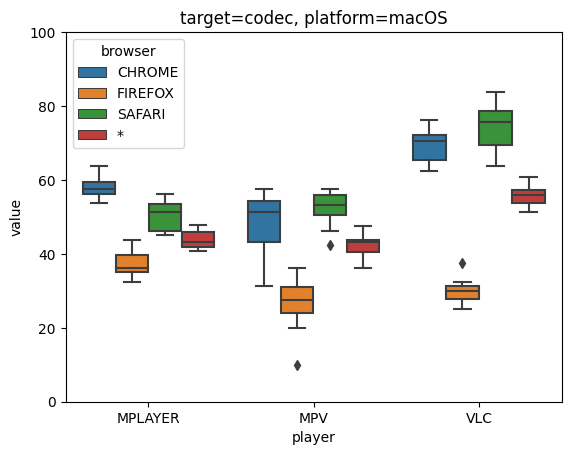

In [50]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="macOS-13.0-arm64-arm-64bit"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=macOS")
plt.show()

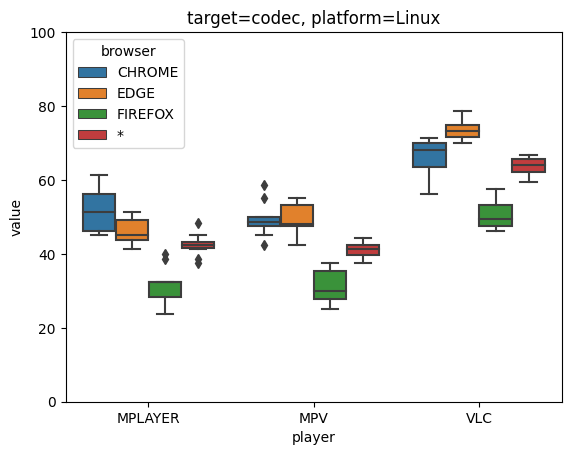

In [51]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Linux-5.15.0-56-generic-x86_64-with-glibc2.35"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Linux")
plt.show()

## Target = player

### Each plot is separate browser

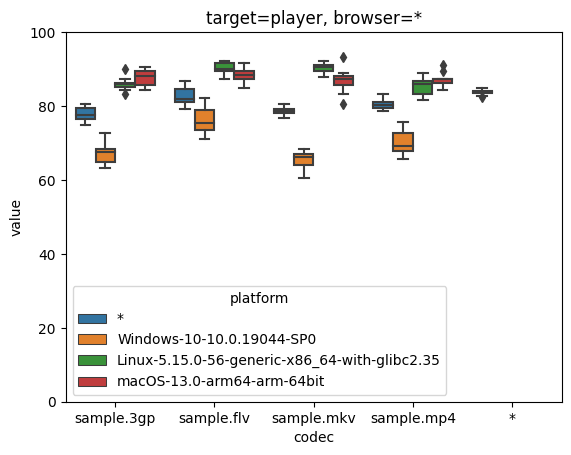

In [53]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=*")
plt.show()

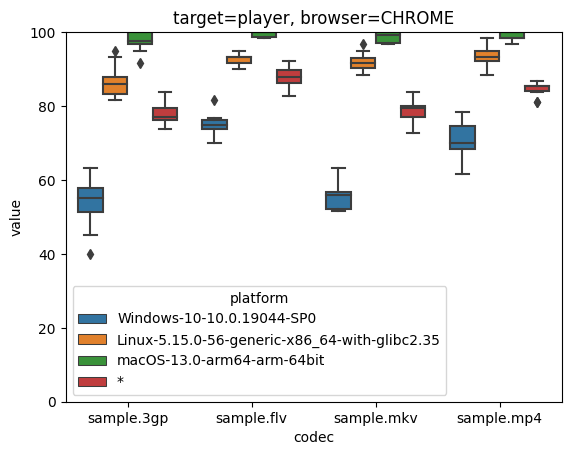

In [56]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=CHROME")
plt.show()

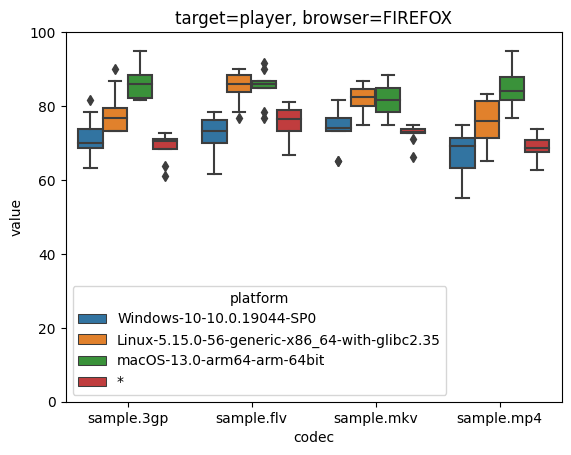

In [57]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

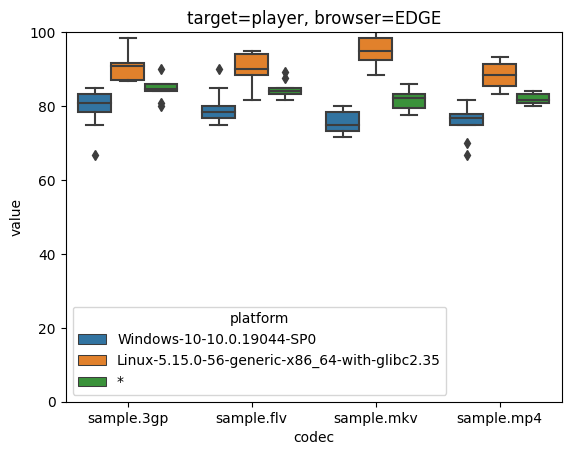

In [58]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=EDGE")
plt.show()

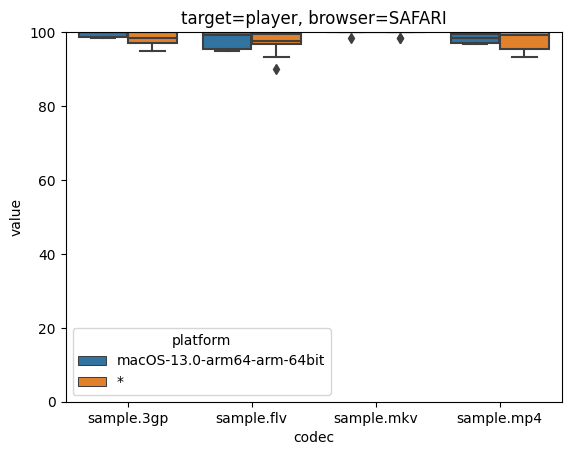

In [59]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=SAFARI")
plt.show()

### Each plot is a separate platform

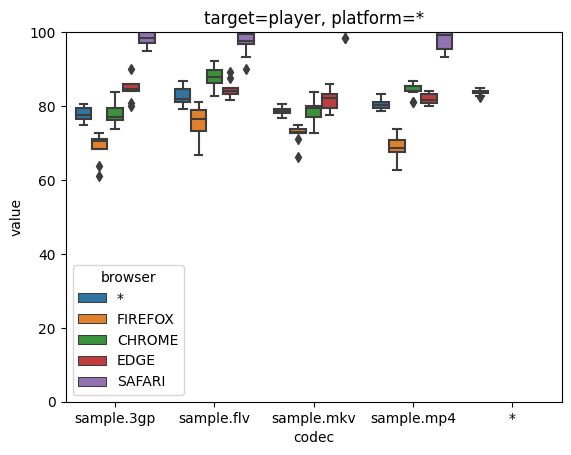

In [61]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=*")
plt.show()

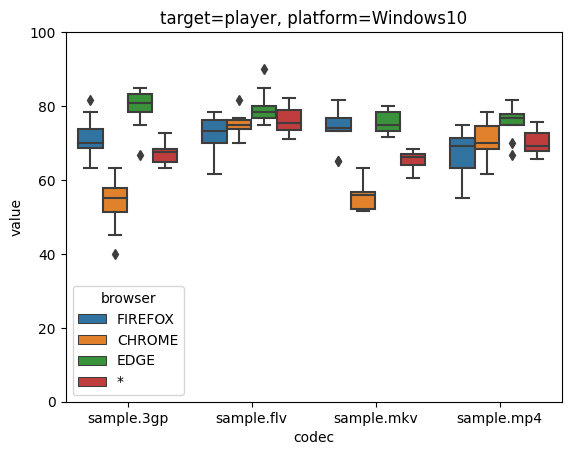

In [72]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Windows-10-10.0.19044-SP0"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Windows10")
plt.show()

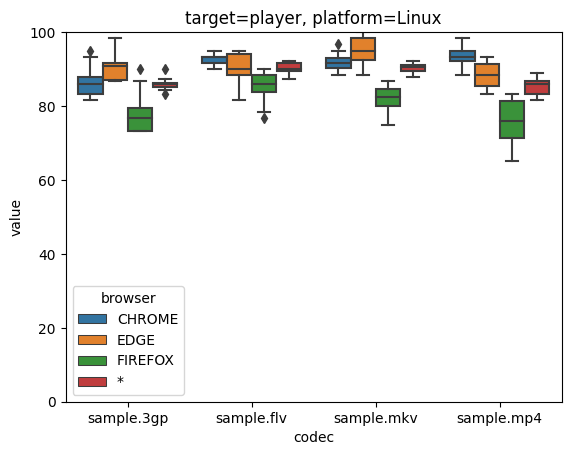

In [73]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Linux-5.15.0-56-generic-x86_64-with-glibc2.35"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Linux")
plt.show()

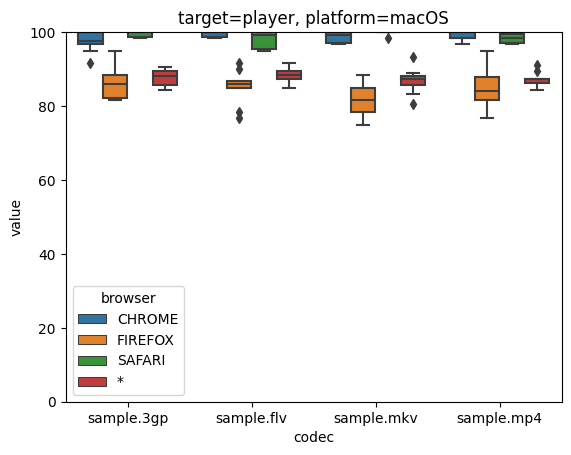

In [76]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="macOS-13.0-arm64-arm-64bit"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=macOS")
plt.show()